In [1]:
# import libraries Required
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from numpy import arange
from scipy.optimize import curve_fit
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading World Bank Data pertaining to Climate Change
climate_change_df1 = pd.read_excel("climate-change-excel-4-6-mb-.xls")
climate_change_df1.drop(columns=[2009, 2010, 2011], inplace=True)

In [3]:
# Applying Transpose function to the df and displaying header records
climate_change_df1 = climate_change_df1.transpose()
climate_change_df1.head()

,0,1,2,3,4,5,6,7,8,9,...,13502,13503,13504,13505,13506,13507,13508,13509,13510,13511
Country code,ABW,ADO,AFG,AGO,ALB,ARE,ARG,ARM,ASM,ATG,...,VNM,VUT,WBG,WLD,WSM,YEM,ZAF,ZAR,ZMB,ZWE
Country name,Aruba,Andorra,Afghanistan,Angola,Albania,United Arab Emirates,Argentina,Armenia,American Samoa,Antigua and Barbuda,...,Vietnam,Vanuatu,West Bank and Gaza,World,Samoa,"Yemen, Rep.",South Africa,"Congo, Dem. Rep.",Zambia,Zimbabwe
Series code,AG.LND.EL5M.ZS,AG.LND.EL5M.ZS,AG.LND.EL5M.ZS,AG.LND.EL5M.ZS,AG.LND.EL5M.ZS,AG.LND.EL5M.ZS,AG.LND.EL5M.ZS,AG.LND.EL5M.ZS,AG.LND.EL5M.ZS,AG.LND.EL5M.ZS,...,SP.URB.TOTL,SP.URB.TOTL,SP.URB.TOTL,SP.URB.TOTL,SP.URB.TOTL,SP.URB.TOTL,SP.URB.TOTL,SP.URB.TOTL,SP.URB.TOTL,SP.URB.TOTL
Series name,Land area below 5m (% of land area),Land area below 5m (% of land area),Land area below 5m (% of land area),Land area below 5m (% of land area),Land area below 5m (% of land area),Land area below 5m (% of land area),Land area below 5m (% of land area),Land area below 5m (% of land area),Land area below 5m (% of land area),Land area below 5m (% of land area),...,Urban population,Urban population,Urban population,Urban population,Urban population,Urban population,Urban population,Urban population,Urban population,Urban population
SCALE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Retransposing and creation of Emissions and Population datasets for further analysis
climate_change_df = climate_change_df1.transpose()
co2_emission_df = climate_change_df[climate_change_df["Series name"] == 'CO2 emissions, total (KtCO2)']
population_df = climate_change_df[climate_change_df["Series name"] == 'Population']
climate_change_df.head()

,Country code,Country name,Series code,Series name,SCALE,Decimals,1990,1991,1992,1993,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,ABW,Aruba,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,29.57481,..,..,..,...,..,29.57481,..,..,..,..,..,..,..,..
1,ADO,Andorra,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0,..,..,..,...,..,0,..,..,..,..,..,..,..,..
2,AFG,Afghanistan,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0,..,..,..,...,..,0,..,..,..,..,..,..,..,..
3,AGO,Angola,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0.208235,..,..,..,...,..,0.208235,..,..,..,..,..,..,..,..
4,ALB,Albania,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,4.967875,..,..,..,...,..,4.967875,..,..,..,..,..,..,..,..


In [5]:
#Displaying Header records of Emissions Dataframe
co2_emission_df.head()

,Country code,Country name,Series code,Series name,SCALE,Decimals,1990,1991,1992,1993,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
1631,ABW,Aruba,EN.ATM.CO2E.KT,"CO2 emissions, total (KtCO2)",0,1,1840.834,1928.842,1723.49,1771.161,...,1686.82,2233.203,2236.87,2255.205,2255.205,2258.872,2273.54,2273.54,2357.881,2288.208
1632,ADO,Andorra,EN.ATM.CO2E.KT,"CO2 emissions, total (KtCO2)",0,1,..,..,..,..,...,513.38,524.381,524.381,531.715,535.382,564.718,575.719,546.383,539.049,539.049
1633,AFG,Afghanistan,EN.ATM.CO2E.KT,"CO2 emissions, total (KtCO2)",0,1,2676.91,2493.56,1426.463,1375.125,...,832.409,781.071,645.392,359.366,583.053,704.064,700.397,696.73,715.065,814.074
1634,AGO,Angola,EN.ATM.CO2E.KT,"CO2 emissions, total (KtCO2)",0,1,4429.736,4367.397,4418.735,5801.194,...,9156.499,9541.534,9732.218,12665.818,9064.824,18793.375,19156.408,22266.024,25151.953,24370.882
1635,ALB,Albania,EN.ATM.CO2E.KT,"CO2 emissions, total (KtCO2)",0,1,7488.014,3971.361,2387.217,2343.213,...,2992.272,3028.942,3230.627,3751.341,4290.39,4004.364,4602.085,4231.718,4481.074,4176.713


In [6]:
#Displayinh Header Records of population Dataframe
population_df.head()

,Country code,Country name,Series code,Series name,SCALE,Decimals,1990,1991,1992,1993,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
12814,ABW,Aruba,SP.POP.TOTL,Population,0,0,62147,64642,68286,72573,...,88442,90271,92363,94596,96875,99046,100996,102711,104225,105526
12815,ADO,Andorra,SP.POP.TOTL,Population,0,0,52773,54996,57767,60670,...,63985,64634,66390,69043,72203,75292,77888,79874,81390,82577
12816,AFG,Afghanistan,SP.POP.TOTL,Population,0,0,19023678,19668810.286705,20335820.344225,21025450.09304,...,25215251.856096,25950815.5,26697430.193609,27465525.271937,28255718.733708,29068646.3577,29904962.214286,30751661.409459,31622333.198945,32517656.318806
12817,AGO,Angola,SP.POP.TOTL,Population,0,0,10335052,10653515,11002910,11371750,...,13511575,13926373,14388244,14890474,15419943,15957460,16489021,17010366,17525367,18037964
12818,ALB,Albania,SP.POP.TOTL,Population,0,0,3289483,3291695,3266983,3224901,...,3072725,3071856,3077378,3089778,3106701,3124861,3141800,3156607,3169665,3181397


In [7]:
# Defining few selected Countries for Analysis
country_list = ["SOM", "MDG", "CHE", "GBR"]

In [8]:
#Recreation of dataframes with only these 4 countries data
co2_emission_df = co2_emission_df[co2_emission_df["Country code"].isin(country_list)]
population_df = population_df[population_df["Country code"].isin(country_list)]

In [9]:
#Defining the required columns in Emissions dataset
co2_emission_df = co2_emission_df.melt(id_vars=["Country code", "Country name", "Series code", "Series name", "SCALE", "Decimals"], 
        var_name="Year", 
        value_name="Value")
co2_emission_df.head()

,Country code,Country name,Series code,Series name,SCALE,Decimals,Year,Value
0,CHE,Switzerland,EN.ATM.CO2E.KT,"CO2 emissions, total (KtCO2)",0,1,1990,42966.239
1,GBR,United Kingdom,EN.ATM.CO2E.KT,"CO2 emissions, total (KtCO2)",0,1,1990,570218.5
2,MDG,Madagascar,EN.ATM.CO2E.KT,"CO2 emissions, total (KtCO2)",0,1,1990,986.423
3,SOM,Somalia,EN.ATM.CO2E.KT,"CO2 emissions, total (KtCO2)",0,1,1990,18.335
4,CHE,Switzerland,EN.ATM.CO2E.KT,"CO2 emissions, total (KtCO2)",0,1,1991,42350.183


In [10]:
#Defining required columns in population dataframe
population_df = population_df.melt(id_vars=["Country code", "Country name", "Series code", "Series name", "SCALE", "Decimals"], 
        var_name="Year", 
        value_name="Value")
population_df.head()

,Country code,Country name,Series code,Series name,SCALE,Decimals,Year,Value
0,CHE,Switzerland,SP.POP.TOTL,Population,0,0,1990,6712000
1,GBR,United Kingdom,SP.POP.TOTL,Population,0,0,1990,57247586
2,MDG,Madagascar,SP.POP.TOTL,Population,0,0,1990,11280625
3,SOM,Somalia,SP.POP.TOTL,Population,0,0,1990,6599249
4,CHE,Switzerland,SP.POP.TOTL,Population,0,0,1991,6800000


In [11]:
#Creation of a function to Normalize the data for Value Column
def normalize_data(df):
    normalized_df=(df["Value"]-df["Value"].mean())/df["Value"].std()
    return normalized_df

<AxesSubplot:xlabel='Year', ylabel='Value'>

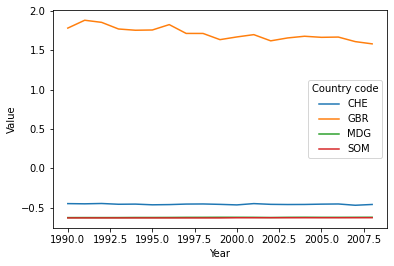

In [12]:
#Lineplot to display Normalized Emission values for all the years for all selected countries
co2_emission_df = co2_emission_df.replace("..", 0)
co2_emission_df["Value"] = normalize_data(co2_emission_df)
sns.lineplot(x='Year',y='Value', hue='Country code', err_style='bars', data=co2_emission_df)

<AxesSubplot:xlabel='Year', ylabel='Value'>

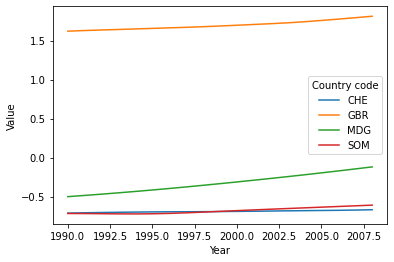

In [13]:
#Lineplot to display Normalized Population values for all the years for all selected countries
population_df = population_df.replace("..", 0)
population_df["Value"] = normalize_data(population_df)
sns.lineplot(x='Year',y='Value', hue='Country code', err_style='bars', data=population_df)

<AxesSubplot:xlabel='Year'>

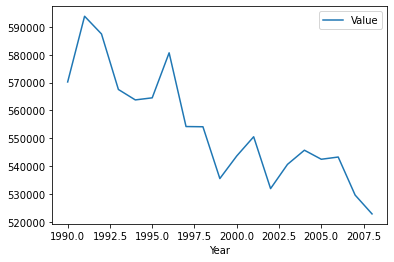

In [14]:
#Emissions data as a line graph for GBR after filling null values with mean
co2_emission_df = climate_change_df[climate_change_df["Series name"] == 'CO2 emissions, total (KtCO2)']
co2_emission_df = co2_emission_df[co2_emission_df["Country code"].isin(country_list)]
co2_emission_df = co2_emission_df.melt(id_vars=["Country code", "Country name", "Series code", "Series name", "SCALE", "Decimals"], 
        var_name="Year", 
        value_name="Value")
co2_emission_df = co2_emission_df.replace("..", None)
co2_emission_df["Value"] = co2_emission_df["Value"].fillna(co2_emission_df["Value"].mean())
co2_emission_df[co2_emission_df["Country code"]=="GBR"].plot(x="Year", y="Value")

<AxesSubplot:xlabel='Year'>

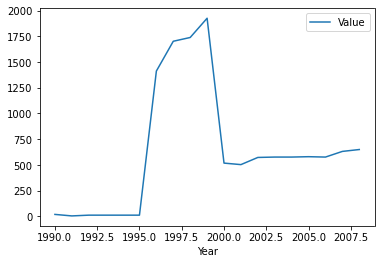

In [15]:
#Emissions data as a line graph for SOMALIA
co2_emission_df[co2_emission_df["Country code"]=="SOM"].plot(x="Year", y="Value")

## Creating cluster of countries

In [16]:
#Defining required columns for climate change dataframe
climate_change_df = climate_change_df.melt(id_vars=["Country code", "Country name", "Series code", "Series name", "SCALE", "Decimals"], 
        var_name="Year", 
        value_name="Value")
climate_change_df.head()

,Country code,Country name,Series code,Series name,SCALE,Decimals,Year,Value
0,ABW,Aruba,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,1990,29.57481
1,ADO,Andorra,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,1990,0
2,AFG,Afghanistan,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,1990,0
3,AGO,Angola,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,1990,0.208235
4,ALB,Albania,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,1990,4.967875


In [17]:
#Creation of new dataframe with emissions and population together in same column
data_df = climate_change_df[climate_change_df["Series name"].isin(['CO2 emissions, total (KtCO2)', 'Population'])]
data_df = data_df.replace("..", None)
data_df["Value"] = data_df["Value"].fillna(data_df["Value"].mean())
data_df.head()

,Country code,Country name,Series code,Series name,SCALE,Decimals,Year,Value
1631,ABW,Aruba,EN.ATM.CO2E.KT,"CO2 emissions, total (KtCO2)",0,1,1990,1840.834
1632,ADO,Andorra,EN.ATM.CO2E.KT,"CO2 emissions, total (KtCO2)",0,1,1990,1840.834
1633,AFG,Afghanistan,EN.ATM.CO2E.KT,"CO2 emissions, total (KtCO2)",0,1,1990,2676.910
1634,AGO,Angola,EN.ATM.CO2E.KT,"CO2 emissions, total (KtCO2)",0,1,1990,4429.736
1635,ALB,Albania,EN.ATM.CO2E.KT,"CO2 emissions, total (KtCO2)",0,1,1990,7488.014


In [18]:
#Merging Dataframes on Country Code and Year Columns into a single dataframe
merged_df = data_df[data_df["Series code"] == "EN.ATM.CO2E.KT"][["Country code", "Year", "Value"]].merge(data_df[data_df["Series code"] == "SP.POP.TOTL"][["Country code", "Year", "Value"]], on=["Country code", "Year"])
merged_df.head()

,Country code,Year,Value_x,Value_y
0,ABW,1990,1840.834,62147.0
1,ADO,1990,1840.834,52773.0
2,AFG,1990,2676.910,19023678.0
3,AGO,1990,4429.736,10335052.0
4,ALB,1990,7488.014,3289483.0


In [19]:
# define the true objective function with curve_fit
def objective(x, a, b):
    return a * x + b
# curve fit
popt, _ = curve_fit(objective, merged_df["Value_x"], merged_df["Value_y"])
# summarize the parameter values
a, b = popt
print('y = %.5f * x + %.5f' % (a, b))

y = 220.49136 * x + 18061307.22872


In [20]:
#Creating a new dataframe with only Great Briton (GBR) and Indonesia (IDN) for analysis
merged_df = data_df[data_df["Series code"] == "EN.ATM.CO2E.KT"][["Country code", "Year", "Value"]].merge(data_df[data_df["Series code"] == "SP.POP.TOTL"][["Country code", "Year", "Value"]], on=["Country code", "Year"])
dx_df = merged_df[merged_df["Country code"].isin(["GBR", "IDN"])]
dx_df["Country code"] = dx_df["Country code"].astype("category").cat.codes
dx_df.head()

,Country code,Year,Value_x,Value_y
71,0,1990,570218.500,57247586.0
91,1,1990,149565.929,184345939.0
304,0,1991,593808.311,57424897.0
324,1,1991,179730.671,187451800.0
537,0,1992,587453.400,57580403.0


In [21]:
#Calculation of lower and upper Confidence Intervals on Population Value
#err_ranges(dx_df["Country code"], 0.95, np.mean(dx_df), st.sem(dx_df))
lower, upper = st.t.interval(0.95, len(dx_df["Value_y"])-1, loc=np.mean(dx_df["Value_y"]), scale=st.sem(dx_df["Value_y"]))
def err_ranges(x, func, param, sigma):
    """
    Calculates the upper and lower limits for the function, parameters and
    sigmas for single value or array x. Functions values are calculated for 
    all combinations of +/- sigma and the minimum and maximum is determined.
    Can be used for all number of parameters and sigmas >=1.
    
    This routine can be used in assignment programs.
    """

    import itertools as iter
    import numpy as np
    
    # initiate arrays for lower and upper limits
    lower = func(x, *param)
    upper = lower
    
    uplow = []   # list to hold upper and lower limits for parameters
    for p,s in zip(param, sigma):
        pmin = p - s
        pmax = p + s
        uplow.append((pmin, pmax))
        
    pmix = list(iter.product(*uplow))
    
    for p in pmix:
        y = func(x, *p)
        lower = np.minimum(lower, y)
        upper = np.maximum(upper, y)
        
    return lower, upper   

In [22]:
#Printing of lower and Upper Confidence Intervals ranges
#err_ranges(dx_df, func, param, sigma)
print(lower)
print(upper)

109162224.52371341
160136257.05523396


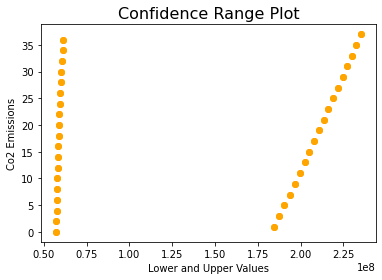

In [23]:
#Plotting the COnfidence Range with lower and Upper Values and Applyig the fitting with objective function
for lower,upper,y in zip(dx_df["Value_y"],dx_df["Value_y"],range(len(dx_df["Value_y"]))):
    plt.plot((lower,upper),(y,y),'ro-',color='orange')
    x_line = arange(lower, upper, 10)
    # calculate the output for the range
    y_line = objective(x_line, a, b)
    # create a line plot for the mapping function
    plt.plot(x_line, y_line, '--', color='red')
#adding overall title
plt.title('Confidence Range Plot', fontsize=16)

#adding axis titles
plt.xlabel('Lower and Upper Values')
plt.ylabel('Co2 Emissions')
plt.show()

In [24]:
#Creation of function to plot the Clusters and using fitting
def plot_graph(merged_df, colored=False):
#    x_line = arange(lower, upper, 100)
    x_line = arange(min(merged_df["Value_x"]), max(merged_df["Value_x"]), 100)
    # calculate the output for the range
    y_line = objective(x_line, a, b)
    # create a line plot for the mapping function
    #plt.plot(x_line, y_line, '--', color='red')
    if not colored:
        plt.scatter(merged_df["Value_x"], merged_df["Value_y"])
    else:
        plt.scatter(merged_df["Value_x"], merged_df["Value_y"], c=identified_clusters, cmap="rainbow")

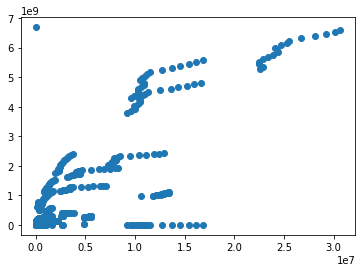

In [25]:
#Plotting the Clusters
plot_graph(merged_df)

In [26]:
#Creation of Categories of the countries
merged_df["Country code"] = merged_df["Country code"].astype("category").cat.codes

In [27]:
#Creation of 4 clusters using KMeans and fitting the model then applying the predictions to the clusters
from sklearn.cluster import KMeans
kmeans = KMeans(4)
kmeans.fit(merged_df)
identified_clusters = kmeans.fit_predict(merged_df)
identified_clusters

array([0, 0, 0, ..., 0, 0, 0])

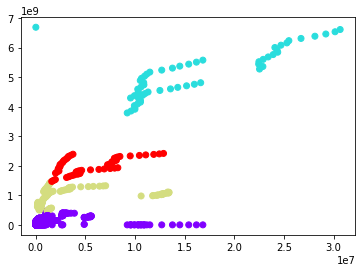

In [28]:
#Plotting the Graph
plot_graph(merged_df, True)

In [29]:
#Again Filtering the Data for GBR and Indonesia for Population and Emissions into a new dataframe test_df
merged_df = data_df[data_df["Series code"] == "EN.ATM.CO2E.KT"][["Country code", "Year", "Value"]].merge(data_df[data_df["Series code"] == "SP.POP.TOTL"][["Country code", "Year", "Value"]], on=["Country code", "Year"])
test_df = merged_df[merged_df["Country code"].isin(["GBR", "IDN"])]
test_df["Country code"] = test_df["Country code"].astype("category").cat.codes
predictions = kmeans.predict(test_df)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [30]:
#Checking Header Records
test_df.head()

,Country code,Year,Value_x,Value_y
71,0,1990,570218.500,57247586.0
91,1,1990,149565.929,184345939.0
304,0,1991,593808.311,57424897.0
324,1,1991,179730.671,187451800.0
537,0,1992,587453.400,57580403.0


In [31]:
#Converting Country Codes from 0 and 1 to Indonesia and GBR & creating two dataframes for emissions and population
test_df.loc[test_df["Country code"] == 0, "Country code"] = "Indonesia"
test_df.loc[test_df["Country code"] == 1, "Country code"] = "GBR"
df = test_df.groupby(['Country code', 'Year']).sum(['Value'])
df_emission = df
df_population = df

In [32]:
#dropping Emissions value from population dataframe and setting the index
df_population = df.drop('Value_x', axis=1)
df_population.set_index(["Value_y"], inplace = True, append = True, drop = True)
df_population.reset_index(inplace=True)
df_population.head()

,Country code,Year,Value_y
0,GBR,1990,184345939.0
1,GBR,1991,187451800.0
2,GBR,1992,190512441.0
3,GBR,1993,193525648.0
4,GBR,1994,196488446.0


In [33]:
#dropping population value from emissions dataframe and setting the index
df_emission = df.drop('Value_y', axis=1)
df_emission.set_index(["Value_x"], inplace = True, append = True, drop = True)
df_emission.reset_index(inplace=True)
df_emission.head()

,Country code,Year,Value_x
0,GBR,1990,149565.929
1,GBR,1991,179730.671
2,GBR,1992,202576.081
3,GBR,1993,218600.871
4,GBR,1994,221413.460


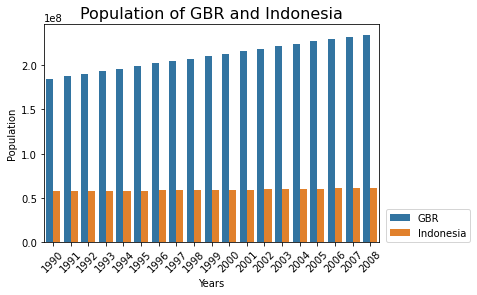

In [34]:
# Plotting the Population Comparision between DBR and Indonasia yearwise
# plot with seaborn barplot
sns.barplot(data=df_population, x='Year', y='Value_y', hue='Country code')
#add overall title
plt.title('Population of GBR and Indonesia', fontsize=16)

#add axis titles
plt.xlabel('Years')
plt.ylabel('Population')

#place legend in center right of plot
plt.legend(bbox_to_anchor=(1.02, 0.15), loc='upper left', borderaxespad=0)

#rotate x-axis labels
plt.xticks(rotation=45)
plt.show()

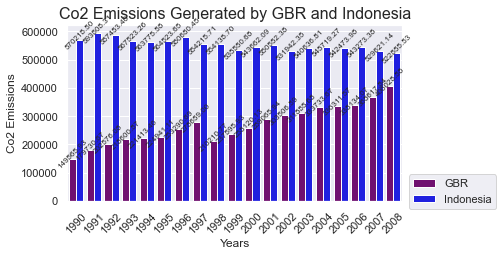

In [35]:
# Plotting the Co2Emission Comparision between DBR and Indonasia yearwise

df = test_df.groupby(['Country code', 'Year']).agg(CO2_emission=("Value_x", 'sum'))
df = df.reset_index()

# set plot style: grey grid in the background:
sns.set(style="darkgrid")

fig, plots = plt.subplots()
# plot barplot
plots = sns.barplot(x="Year",
           y="CO2_emission",
           hue="Country code", 
           data=df, ci = "sd", capsize = 0.1, palette=['purple', 'blue'])

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 5), rotation=45,
                   textcoords='offset points')
    
plots.set_box_aspect(100/(len(plots.patches)*5)) #change 100 to modify the y/x axis ratio

#added overall title
plt.title('Co2 Emissions Generated by GBR and Indonesia', fontsize=16)

#added axis titles
plt.xlabel('Years')
plt.ylabel('Co2 Emissions')

#placed legend in Corner of plot
plt.legend(bbox_to_anchor=(1.02, 0.15), loc='upper left', borderaxespad=0)

#rotate x-axis labels
plt.xticks(rotation=45)
plt.show()